# Vision models with structured output
In this notebook we will ask a vision model to produce structured output, so that we can put the image in categories or use the information to write Python code for analysing the image.

In [1]:
import openai
from skimage.io import imread
import stackview
from image_utilities import numpy_to_bytestream
import base64
from stackview._image_widget import _img_to_rgb
from IPython.display import Markdown

StackViewNDArray([[[ 3,  6,  1],
                   [ 3,  7,  0],
                   [ 3,  6,  1],
                   ...,
                   [11,  8,  2],
                   [11,  7,  2],
                   [11, 11,  2]],

                  [[ 3,  6,  1],
                   [ 3,  8,  1],
                   [ 3,  7,  1],
                   ...,
                   [11, 10,  2],
                   [10, 10,  2],
                   [11, 11,  2]],

                  [[ 4,  6,  1],
                   [ 3,  6,  1],
                   [ 4,  6,  1],
                   ...,
                   [10, 10,  2],
                   [11, 10,  2],
                   [11, 10,  2]],

                  ...,

                  [[15, 14,  8],
                   [14, 14,  8],
                   [15, 14,  7],
                   ...,
                   [10, 11,  5],
                   [10, 12,  4],
                   [11, 14,  5]],

                  [[14, 16,  7],
                   [16, 15,  7],
                   [15, 16,  8],
                   ...,
                   [10, 11,  4],
                   [11, 13,  4],
                   [11, 16,  5]],

                  [[15, 18,  7],
                   [14, 17,  8],
                   [14, 17,  8],
                   ...,
                   [ 9, 12,  5],
                   [10, 13,  5],
                   [11, 15,  5]]], dtype=uint8)
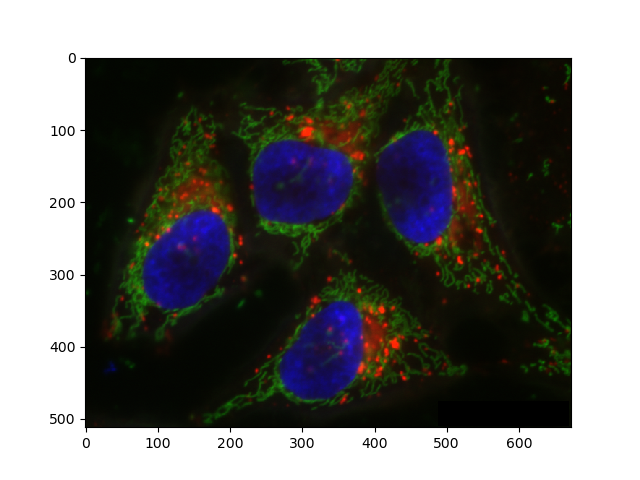
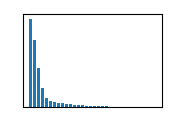

In [2]:
hela = imread("data/hela-cells-8bit.tif")
stackview.insight(hela)

In [3]:
def prompt_chatGPT(prompt:str, image, model="gpt-4o"):
    """A prompt helper function that sends a message to openAI
    and returns only the text response.
    """
    rgb_image = _img_to_rgb(image)
    byte_stream = numpy_to_bytestream(rgb_image)
    base64_image = base64.b64encode(byte_stream).decode('utf-8')

    message = [{"role": "user", "content": [
        {"type": "text", "text": prompt},
        {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
        }
    }]}]
            
    # setup connection to the LLM
    client = openai.OpenAI()
    
    # submit prompt
    response = client.chat.completions.create(
        model=model,
        messages=message
    )
    
    # extract answer
    return response.choices[0].message.content

In [4]:
result = prompt_chatGPT("""You are a highly experienced biologist with advanced microscopy skills.

# Task
Name the content of this image. Answer for each channel independently. 

# Options
The following structures could be in the image:
* Nulcei
* Membranes
* Cytoplasm
* Cytoskeleton
* Extra-cellular structure
* Other sub-cellular structures

# Output format
* Red channel: <structure>
* Green channel: <structure>
* Blue channel: <structure>

Keep your answer as short as possible. 
Only respond with the structres for the three channels in the format shown above.
""", hela)

Markdown(result)

* Red channel: Other sub-cellular structures
* Green channel: Cytoskeleton
* Blue channel: Nuclei

## Exercise
Ask the vision model to generate Python code for segmenting the image. Try using llava for the same task.